In [2]:
#importing 
import pandas as pd
from pathlib import Path
import numpy as np
import os
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.graph_objects as go
import tkinter
from tkinter import messagebox
import matplotlib.pyplot as plt
from PIL import Image


%matplotlib inline

In [3]:
#activiating panel extension in Jupyter lab
pn.extension("plotly")

In [4]:
#initialize hvplot.pandas after pn.extension
import hvplot.pandas

In [8]:
os. getcwd()

'C:\\Users\\Jacks\\Desktop\\New Fintech\\Craig-theG-ng\\Data\\price_index_by_city'

In [10]:
#importing csv data
csvluxury = Path("../Luxury_goods.csv")
csvbigmac1 = Path("../big_mac_index/big-mac-full-index.csv")
csvpriceindex = Path("../price_index_by_city/PropertyPriceIndexByCity_2021.csv")
path = "../price_index_by_city"
csvlocation = Path("../avg.csv")
os.chdir(path)
dir_list = os.listdir(path)
imgAU = Image.open("AU_fig.png")
imgUS = Image.open("US_fig.png")
imgAR = Image.open("AR_fig.png")
imgBR = Image.open("BR_fig.png")
imgCAN = Image.open("CAN_fig.png")
imgJP = Image.open("JP_fig.png")
imgME = Image.open("ME_fig.png")
imgRS = Image.open("RS_fig.png")
imgSI = Image.open("SI_fig.png")
imgSW = Image.open("SW_fig.png")

In [11]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [12]:
#new python library to introduce to group using mapbox
messagebox.showinfo("Title", "Presented to you by Craig and the Gang, members include: Craig Braganza, Antonio Albuquerque & Jacky Hong")

'ok'

In [13]:
#reading in multiple price index csv by for loop and concating it to sheet_df
#setting ID name using l/rstrip and adding ID name to a new column and name the column "Year"
#append all filtered data to df
df = pd.DataFrame()
# print("Loop Progress:")
for file in dir_list:
    if file.endswith('.csv'):
        print("Adding to Dataframe",file)
        sheet_df = pd.concat([pd.read_csv(file)], ignore_index = True)
        id =file.lstrip('PropertyPriceIndexByCity_').rstrip('.csv')
        print(id)
        sheet_df['Year'] = id
        df = df.append(sheet_df, ignore_index = True)
        print("complete:",file)

Adding to Dataframe PropertyPriceIndexByCity_2010.csv
2010
complete: PropertyPriceIndexByCity_2010.csv
Adding to Dataframe PropertyPriceIndexByCity_2011.csv
2011
complete: PropertyPriceIndexByCity_2011.csv
Adding to Dataframe PropertyPriceIndexByCity_2012.csv
2012
complete: PropertyPriceIndexByCity_2012.csv
Adding to Dataframe PropertyPriceIndexByCity_2013.csv
2013
complete: PropertyPriceIndexByCity_2013.csv
Adding to Dataframe PropertyPriceIndexByCity_2014.csv
2014
complete: PropertyPriceIndexByCity_2014.csv
Adding to Dataframe PropertyPriceIndexByCity_2015.csv
2015
complete: PropertyPriceIndexByCity_2015.csv
Adding to Dataframe PropertyPriceIndexByCity_2016.csv
2016
complete: PropertyPriceIndexByCity_2016.csv
Adding to Dataframe PropertyPriceIndexByCity_2017.csv
2017
complete: PropertyPriceIndexByCity_2017.csv
Adding to Dataframe PropertyPriceIndexByCity_2018.csv
2018
complete: PropertyPriceIndexByCity_2018.csv
Adding to Dataframe PropertyPriceIndexByCity_2019.csv
2019
complete: Prop

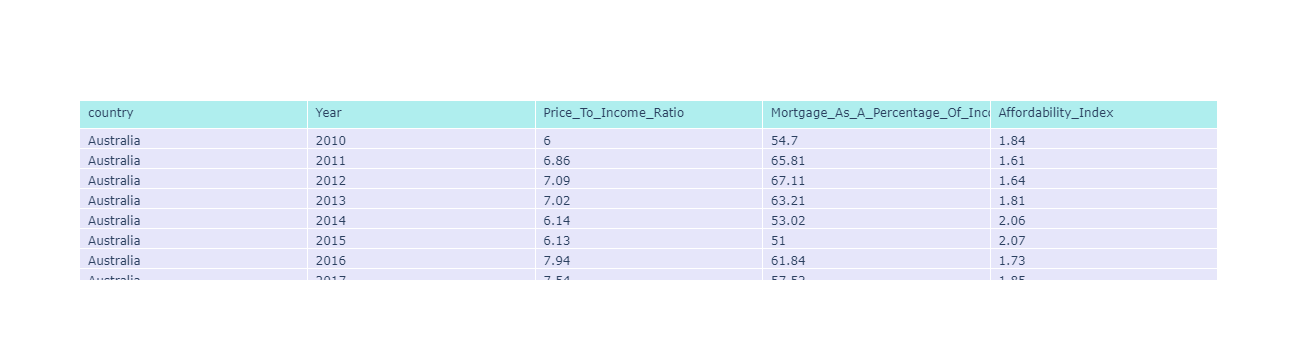

In [63]:
# Data cleaning for price indexes (pi)
# cleaning data and store required valued to new variable df_pi
df1 = df[["City", "Price To Income Ratio", "Mortgage As A Percentage Of Income", "Affordability Index", "Year"]] 
df1[["city","state","country"]] = df["City"].str.split(", ", expand = True)
df1.replace(to_replace=[None], value=np.nan, inplace=True)
df1.loc[df1['country'].isnull(),'country'] = df1['state']
df1 = df1.drop(columns = ["City", "city", "state"])
df_pi = df1.groupby(["country","Year"]).mean().loc[["Australia","United States", "Japan", "Singapore", "Switzerland", "Argentina", "Russia", "Brazil", "Mexico", "Canada"]]

#selecting pi data and storing in a new variable for data analysis by country
AUS_pi = df_pi.loc["Australia"]
USA_pi = df_pi.loc["United States"]
JPY_pi = df_pi.loc["Japan"]
SIN_pi = df_pi.loc["Singapore"]
SWI_pi = df_pi.loc["Switzerland"]
ARG_pi = df_pi.loc["Argentina"]
RUS_pi = df_pi.loc["Russia"]
BRA_pi = df_pi.loc["Brazil"]
MEX_pi = df_pi.loc["Mexico"]
CAN_pi = df_pi.loc["Canada"]

#graphing the table 
df_graph = df_pi.rename(columns=
    {"Price To Income Ratio" : "Price_To_Income_Ratio",
     "Mortgage As A Percentage Of Income" : "Mortgage_As_A_Percentage_Of_Income",
     "Affordability Index" : "Affordability_Index"
    }).reset_index().round(2)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_graph.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_graph.country, df_graph.Year, df_graph.Price_To_Income_Ratio, df_graph.Mortgage_As_A_Percentage_Of_Income, df_graph.Affordability_Index],
               fill_color='lavender',
               align='left'))
])

fig.show()


In [50]:
df

Unnamed: 0                          City  Price To Income Ratio  \
0              0                Chennai, India                  61.15   
1              1                Minsk, Belarus                  40.00   
2              2              Hyderabad, India                  34.86   
3              3          Cluj-Napoca, Romania                  34.05   
4              4            Bucharest, Romania                  30.89   
...          ...                           ...                    ...   
4211         497  Rochester, NY, United States                   1.65   
4212         498      Akron, OH, United States                   1.63   
4213         499   Syracuse, NY, United States                   1.55   
4214         500    Detroit, MI, United States                   1.55   
4215         501    Memphis, TN, United States                   1.43   

      Gross Rental Yield City Centre  Gross Rental Yield Outside of Centre  \
0                               2.78                                  2.64   
1                               7.53                                  3.19   
2                               1.25                                  0.98   
3                               2.04                                  3.27   
4                               4.30                                  4.22   
...                              ...                                   ...   
4211                           13.66                                 27.09   
4212                           12.42                                 18.84   
4213                           22.16                                 35.75   
4214                           29.72                                 43.16   
4215                           19.10                                 33.54   

      Price To Rent Ratio City Centre  \
0                               35.96   
1                               13.27   
2                               79.77   
3                               49.08   
4                               23.25   
...                               ...   
4211                             7.32   
4212                             8.05   
4213                             4.51   
4214                             3.36   
4215                             5.24   

      Price To Rent Ratio Outside Of City Centre  \
0                                          37.82   
1                                          31.36   
2                                         101.87   
3                                          30.61   
4                                          23.70   
...                                          ...   
4211                                        3.69   
4212                                        5.31   
4213                                        2.80   
4214                                        2.32   
4215                                        2.98   

      Mortgage As A Percentage Of Income  Affordability Index  Year  
0                                 613.81                 0.16  2010  
1                                 704.06                 0.14  2010  
2                                 460.64                 0.22  2010  
3                                 316.76                 0.32  2010  
4                                 408.22                 0.24  2010  
...                                  ...                  ...   ...  
4211                               12.37                 8.08  2021  
4212                               12.00                 8.33  2021  
4213                               11.72                 8.53  2021  
4214                               11.27                 8.87  2021  
4215                               10.02                 9.98  2021  

[4216 rows x 10 columns]

Price to income ratio is the number of years that an average home buyer needs to save up for a down payment on a home and still have enough to allocate a reasonable percentage of their monthly income toward mortgage payments
As we can see from the graphs below, countries like Singapore and Argentina has the highest price to income ratio. An average person in Argentina will need to save up for 24.61 years in 2021 in order to save up for a downpayment to purchase a property


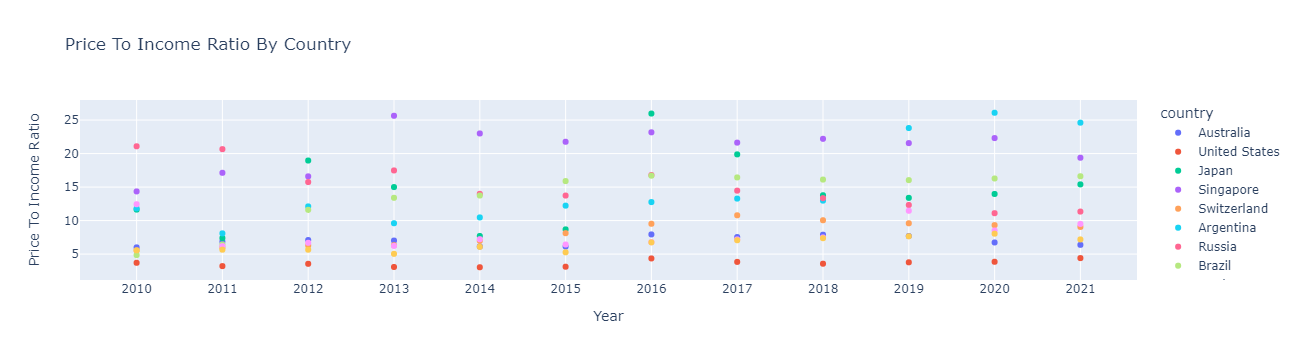

In [17]:
#Price to income ratio graph
PTIR = df_pi["Price To Income Ratio"].reset_index()
PTIR = px.scatter(PTIR, x = "Year", y = "Price To Income Ratio", color = "country", title = "Price To Income Ratio By Country")
print("Price to income ratio is the number of years that an average home buyer needs to save up for a down payment on a home and still have enough to allocate a reasonable percentage of their monthly income toward mortgage payments")
print("As we can see from the graphs below, countries like Singapore and Argentina has the highest price to income ratio. An average person in Argentina will need to save up for 24.61 years in 2021 in order to save up for a downpayment to purchase a property")
PTIR

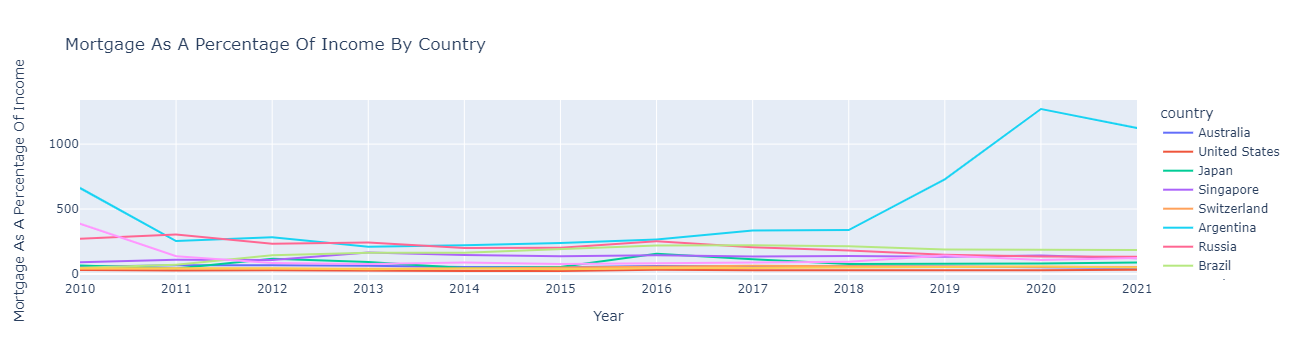

In [22]:
#Mortgage As A Percentage Of Income graph
MAPI = df_pi["Mortgage As A Percentage Of Income"].reset_index().round(2)
MAPI = px.line(MAPI, x = "Year", y = "Mortgage As A Percentage Of Income", color = "country", title = "Mortgage As A Percentage Of Income By Country")
MAPI

the higher the affordability index, the better


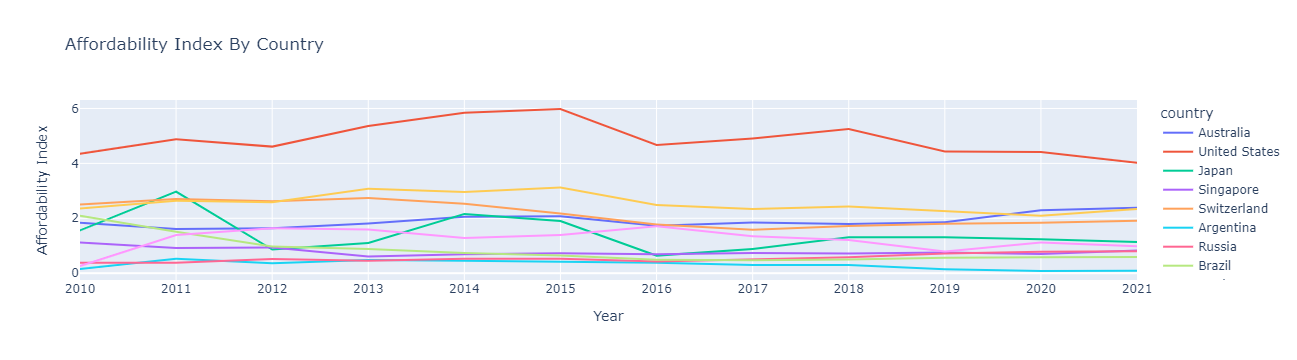

In [23]:
#Affordability Index graph
AI = df_pi["Affordability Index"].reset_index().round(2)
AI = px.line(AI, x = "Year", y = "Affordability Index", color = "country", title = "Affordability Index By Country")
print("the higher the affordability index, the better")
AI


In [24]:
## Reading and cleaning data for luxury goods

In [25]:
#reading data
data = pd.read_csv(csvluxury)

#slice data to get the Date and Price
data_1 = data.iloc[:, [0,1]]

#separate dates into month and year column
data_1[["month", "year"]] = data_1["Date"].str.split(" ", expand = True)

#setting price as float and removing comma
data_2 = data_1.drop(columns = ["Date", "month"])
data_2['Price'] = data_2['Price'].str.replace(',','')
data_2['Price'] = data_2['Price'].astype(float, errors = 'raise')

#groupby years for the average yearly price and dropping years that does not have 12 months of data
data_grp = data_2.groupby("year").mean().drop(index = ["09", "22"])
luxury_data = data_grp.reset_index()
# luxury_data.plot(title = "S&P Global Luxury Index from 10 - 21")
luxury_data["year"] = pd.to_numeric(luxury_data["year"])
luxury_data["year"] = luxury_data["year"] + 2000
df_lg = luxury_data.set_index("year").round(2)
df_lg

C:\Users\Jacks\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Price
year         
2010  1166.03
2011  1501.44
2012  1599.63
2013  2009.35
2014  2240.65
2015  2117.35
2016  1910.02
2017  2341.83
2018  2693.00
2019  2683.00
2020  2948.28
2021  4561.89

In [26]:
#luxury goods graph
plot_lg = df_lg.hvplot(title = "S&P 500 Global Luxury Goods Index")
plot_lg

:Curve   [year]   (Price)

In [27]:
# Reading and cleaning data for big mac index

In [28]:
#reading in big mac data for each country
bigmac = pd.read_csv(csvbigmac1)
bigmac = bigmac.iloc[:, [0,3,6]]
bigmac.head()

#slicing date column by dates, country and calculating average prices
bigmac[["year", "month", "day"]] = bigmac["date"].str.split("-", expand = True)
bigmac = bigmac.drop(columns = ["date", "month", "day"]).set_index("name")

#average yearly price of big mac in Australia
AUS = bigmac.loc["Australia"]
AUS = AUS.groupby("year").mean().tail(12)

#average yearly price of big mac in US
USA = bigmac.loc["United States"]
USA = USA.groupby("year").mean().tail(12)

#Average yearly price of big mac in Japan
JPY = bigmac.loc["Japan"]
JPY = JPY.groupby("year").mean().tail(12)

#Average yearly price of big mac in Singapore
SIN = bigmac.loc["Singapore"]
SIN = SIN.groupby("year").mean().tail(12)

##Average yearly price of big mac in Switzerland
SWI = bigmac.loc["Switzerland"]
SWI = SWI.groupby("year").mean().tail(12)

#Average yearly price of big mac in Argentina
ARG = bigmac.loc["Argentina"]
ARG = ARG.groupby("year").mean().tail(12)

#Average yearly price of big mac in RUSSIA
RUS = bigmac.loc["Russia"]
RUS = RUS.groupby("year").mean().tail(12)

#Average yearly price of big mac in BRAZIL
BRA = bigmac.loc["Brazil"]
BRA = BRA.groupby("year").mean().tail(12)

#Average yearly price of big mac in Mexico
MEX = bigmac.loc["Mexico"]
MEX = MEX.groupby("year").mean().tail(12)

#Average yearly price of big mac in CANADA
CAN = bigmac.loc["Canada"]
CAN = CAN.groupby("year").mean().tail(12)

#setting the years from 2010 to 2021
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
bigmac_1 = bigmac.loc[bigmac['year'].isin(years)]

In [29]:
#Bigmac plotting by year = px.scatter(plot_bigmac, x = "year", y = "dollar_price", color = "Country", title = "Big Mac Price Index from 2000 - 2021")
plot_bigmac = bigmac_1.groupby(["name","year"]).mean().loc[["Australia","United States", "Japan", "Singapore", "Switzerland", "Argentina", "Russia", "Brazil", "Mexico", "Canada"]]
plot_bigmac = plot_bigmac.reset_index().rename(columns = {"name" :"Country"})
plot_bigmac = plot_bigmac.hvplot(title = "Big Mac Price Index By Country", groupby = "Country", x = "year")
plot_bigmac

:DynamicMap   [Country]
   :Curve   [year]   (dollar_price)

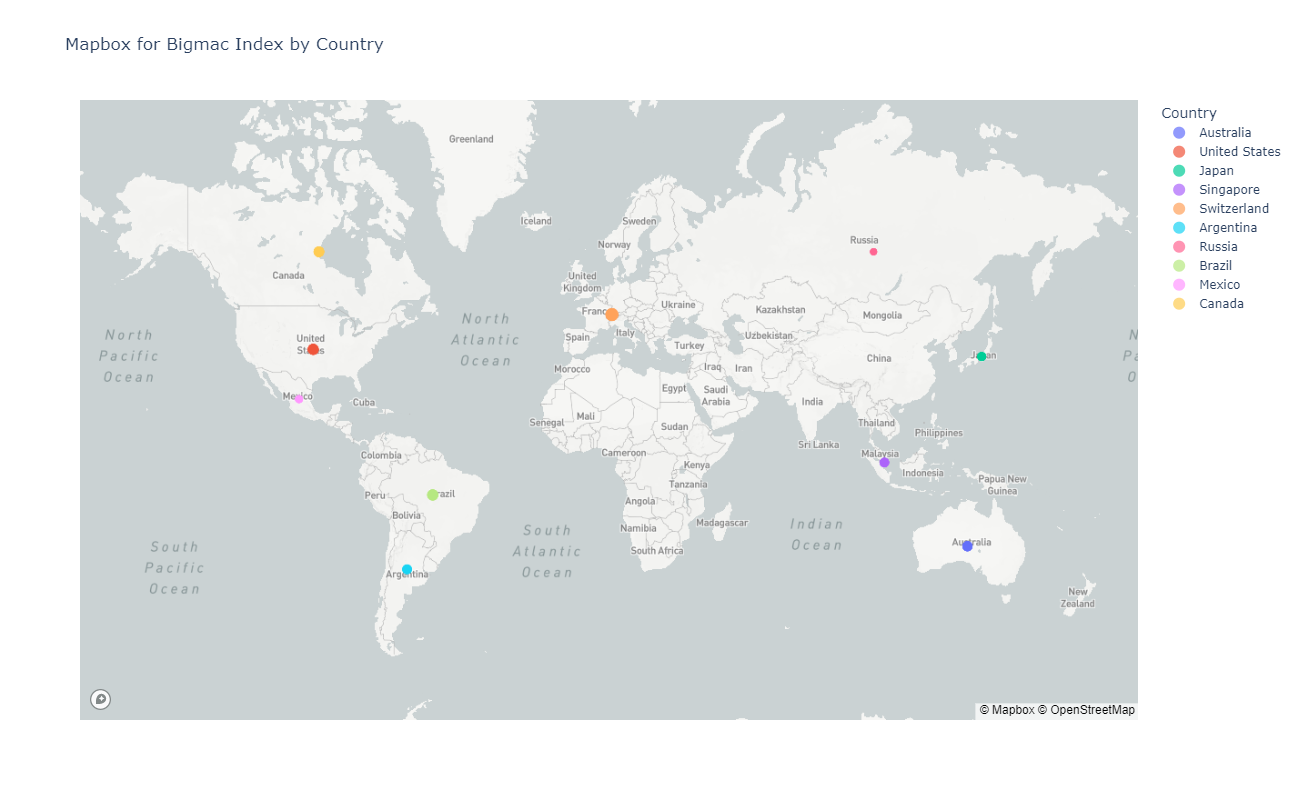

In [56]:
#getting Longitude and Latitude for 10 countries
location = pd.read_csv(csvlocation)
location = location.set_index("Country")
location = location.loc[["Australia","United States", "Japan", "Singapore", "Switzerland", "Argentina", "Russia", "Brazil", "Mexico", "Canada"]].drop(columns = "ISO 3166 Country Code")

#resetting bigmac index to concat with location 
AC1 = bigmac.reset_index().rename(columns = {"name" : "Country"}).set_index(["Country","year"])
AC1 = AC1.loc[["Australia","United States", "Japan", "Singapore", "Switzerland", "Argentina", "Russia", "Brazil", "Mexico", "Canada"]]

#joining datas frames together for Mapbox to visualise the average price of bigmac from 2000 - 2021
new = AC1.join(location, on="Country").round(2)
new1 = new.reset_index()

#showing data in mapbox
map_1 = px.scatter_mapbox(
    new1,
    lat="Latitude",
    lon="Longitude",
    color="Country",
    size = "dollar_price",
    zoom = 1,
    size_max = 10,
    height = 800,
    title = "Mapbox for Bigmac Index by Country"
)
map_1

In [57]:
#adding pi,lg,bigmac data into one dataframe
AUS_pi["S&P Global Luxury Goods Index"] = df_lg.values
AUS_pi["Big Mac Price Index in USD"] = AUS
Australia = AUS_pi

USA_pi["S&P Global Luxury Goods Index"] = df_lg.values
USA_pi["Big Mac Price Index in USD"] = USA
United_States = USA_pi

JPY_pi["S&P Global Luxury Goods Index"] = df_lg.values
JPY_pi["Big Mac Price Index in USD"] = JPY
Japan = JPY_pi

SIN_pi["S&P Global Luxury Goods Index"] = df_lg.values
SIN_pi["Big Mac Price Index in USD"] = SIN
Singapore = SIN_pi

SWI_pi["S&P Global Luxury Goods Index"] = df_lg.values
SWI_pi["Big Mac Price Index in USD"] = SWI
Switzerland = SWI_pi

ARG_pi["S&P Global Luxury Goods Index"] = df_lg.values
ARG_pi["Big Mac Price Index in USD"] = ARG
Argentina = ARG_pi

RUS_pi["S&P Global Luxury Goods Index"] = df_lg.values
RUS_pi["Big Mac Price Index in USD"] = RUS
Russia = RUS_pi

BRA_pi["S&P Global Luxury Goods Index"] = df_lg.values
BRA_pi["Big Mac Price Index in USD"] = BRA
Brazil = BRA_pi

MEX_pi["S&P Global Luxury Goods Index"] = df_lg.values
MEX_pi["Big Mac Price Index in USD"] = MEX
Mexico = MEX_pi

CAN_pi["S&P Global Luxury Goods Index"] = df_lg.values
CAN_pi["Big Mac Price Index in USD"] = CAN
Canada = CAN_pi

Canada

C:\Users\Jacks\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jacks\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jacks\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Price To Income Ratio  Mortgage As A Percentage Of Income  \
Year                                                              
2010               5.560000                           42.950000   
2011               5.658571                           43.708571   
2012               5.656000                           43.762667   
2013               5.036842                           36.343684   
2014               6.084815                           42.556296   
2015               5.264138                           36.600690   
2016               6.748750                           44.387500   
2017               7.067500                           46.300000   
2018               7.374444                           48.590000   
2019               7.656667                           53.778889   
2020               8.046923                           56.703846   
2021               7.186875                           49.142500   

      Affordability Index  S&P Global Luxury Goods Index  \
Year                                                       
2010             2.360000                        1166.03   
2011             2.640000                        1501.44   
2012             2.582667                        1599.63   
2013             3.082105                        2009.35   
2014             2.963704                        2240.65   
2015             3.123103                        2117.35   
2016             2.475000                        1910.02   
2017             2.341250                        2341.83   
2018             2.434444                        2693.00   
2019             2.254444                        2683.00   
2020             2.088462                        2948.28   
2021             2.341875                        4561.89   

      Big Mac Price Index in USD  
Year                              
2010                    3.987171  
2011                    5.000793  
2012                    4.827628  
2013                    5.327380  
2014                    5.132137  
2015                    4.587777  
2016                    4.374477  
2017                    4.582750  
2018                    5.162245  
2019                    5.120404  
2020                    5.129163  
2021                    5.300689

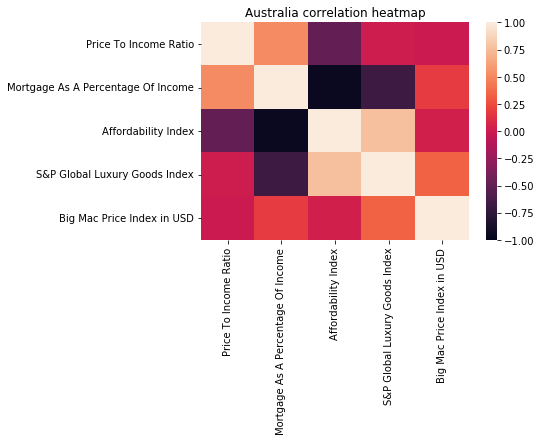

In [32]:
#AUS data correlation
AUS_cor = AUS_pi.corr()
AU_cor = sns.heatmap(AUS_cor, vmin = -1, vmax = 1)
AU_cor.set_title('Australia correlation heatmap')
AU_fig = AU_cor.get_figure()
AU_fig.savefig("AU_fig.png", bbox_inches= "tight")

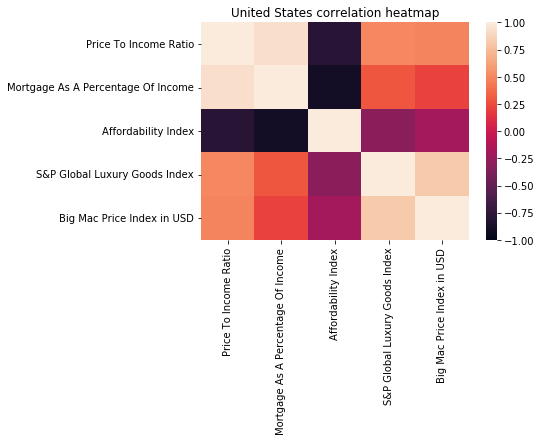

In [33]:
#USA data correlation
USA_cor = USA_pi.corr()
US_cor = sns.heatmap(USA_cor, vmin = -1, vmax = 1)
US_cor.set_title('United States correlation heatmap')
US_fig = US_cor.get_figure()
US_fig.savefig("US_fig.png", bbox_inches= "tight")

In [34]:
#USA correlation 
USA_cor

Price To Income Ratio  \
Price To Income Ratio                            1.000000   
Mortgage As A Percentage Of Income               0.936255   
Affordability Index                             -0.783012   
S&P Global Luxury Goods Index                    0.503776   
Big Mac Price Index in USD                       0.490718   

                                    Mortgage As A Percentage Of Income  \
Price To Income Ratio                                         0.936255   
Mortgage As A Percentage Of Income                            1.000000   
Affordability Index                                          -0.903200   
S&P Global Luxury Goods Index                                 0.292327   
Big Mac Price Index in USD                                    0.213414   

                                    Affordability Index  \
Price To Income Ratio                         -0.783012   
Mortgage As A Percentage Of Income            -0.903200   
Affordability Index                            1.000000   
S&P Global Luxury Goods Index                 -0.307486   
Big Mac Price Index in USD                    -0.192935   

                                    S&P Global Luxury Goods Index  \
Price To Income Ratio                                    0.503776   
Mortgage As A Percentage Of Income                       0.292327   
Affordability Index                                     -0.307486   
S&P Global Luxury Goods Index                            1.000000   
Big Mac Price Index in USD                               0.823785   

                                    Big Mac Price Index in USD  
Price To Income Ratio                                 0.490718  
Mortgage As A Percentage Of Income                    0.213414  
Affordability Index                                  -0.192935  
S&P Global Luxury Goods Index                         0.823785  
Big Mac Price Index in USD                            1.000000

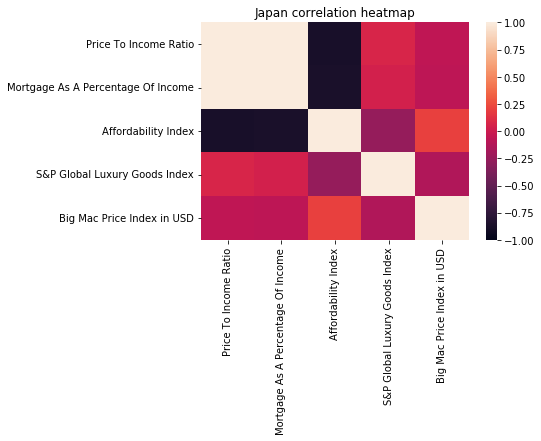

In [35]:
#JPY data correlation
JPY_cor = JPY_pi.corr()
JP_cor = sns.heatmap(JPY_cor, vmin = -1, vmax = 1)
JP_cor.set_title('Japan correlation heatmap')
JP_fig = JP_cor.get_figure()
JP_fig.savefig("JP_fig.png", bbox_inches= "tight")

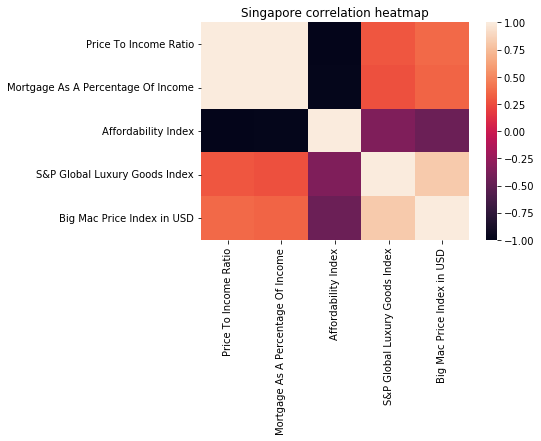

In [36]:
#SIN data correlation
SIN_cor = SIN_pi.corr()
SI_cor = sns.heatmap(SIN_cor, vmin = -1, vmax = 1)
SI_cor.set_title('Singapore correlation heatmap')
SI_fig = SI_cor.get_figure()
SI_fig.savefig("SI_fig.png", bbox_inches= "tight")

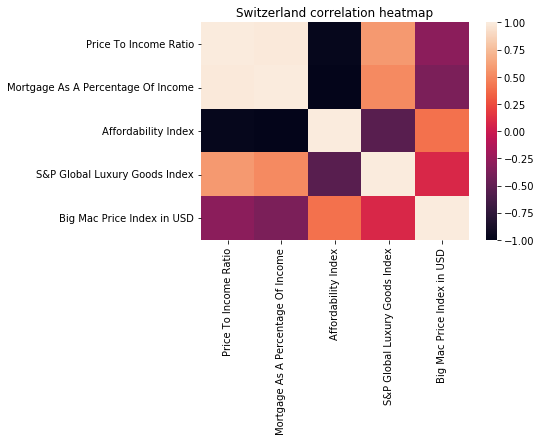

In [37]:
#SWI data correlation
SWI_cor = SWI_pi.corr()
SW_cor = sns.heatmap(SWI_cor, vmin = -1, vmax = 1)
SW_cor.set_title('Switzerland correlation heatmap')
SW_fig = SW_cor.get_figure()
SW_fig.savefig("SW_fig.png", bbox_inches= "tight")

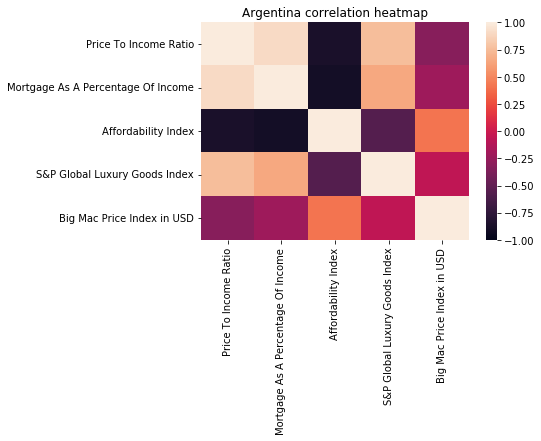

In [38]:
#ARG data correlation
ARG_cor = ARG_pi.corr()
AR_cor = sns.heatmap(ARG_cor, vmin = -1, vmax = 1)
AR_cor.set_title('Argentina correlation heatmap')
AR_fig = AR_cor.get_figure()
AR_fig.savefig("AR_fig.png", bbox_inches= "tight")

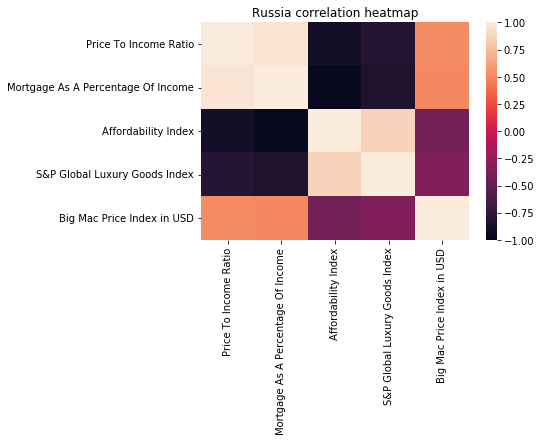

In [39]:
#RUS data correlation
RUS_cor = RUS_pi.corr()
RS_cor = sns.heatmap(RUS_cor, vmin = -1, vmax = 1)
RS_cor.set_title('Russia correlation heatmap')
RS_fig = RS_cor.get_figure()
RS_fig.savefig("RS_fig.png", bbox_inches= "tight")

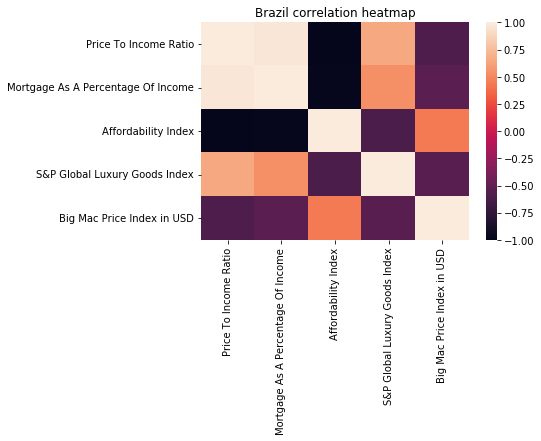

In [40]:
#BRA data correlation
BRA_cor = BRA_pi.corr()
BR_cor = sns.heatmap(BRA_cor, vmin = -1, vmax = 1)
BR_cor.set_title('Brazil correlation heatmap')
BR_fig = BR_cor.get_figure()
BR_fig.savefig("BR_fig.png", bbox_inches= "tight")

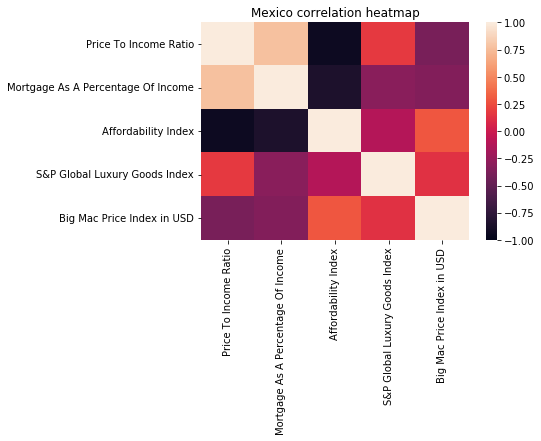

In [41]:
#MEX data correlation
MEX_cor = MEX_pi.corr()
ME_cor = sns.heatmap(MEX_cor, vmin = -1, vmax = 1)
ME_cor.set_title('Mexico correlation heatmap')
ME_fig = ME_cor.get_figure()
ME_fig.savefig("ME_fig.png", bbox_inches= "tight")

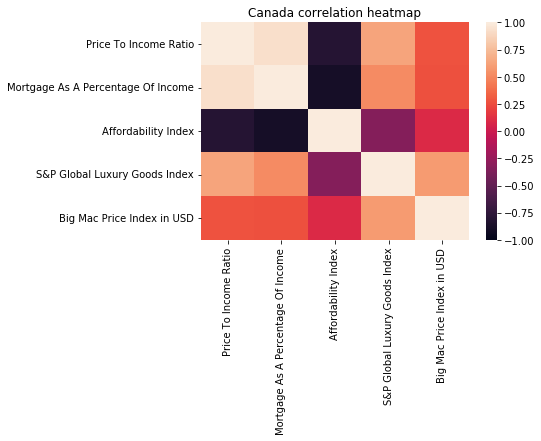

In [42]:
#CAN data correlation
CAN_cor = CAN_pi.corr()
CA_cor = sns.heatmap(CAN_cor, vmin = -1, vmax = 1)
CA_cor.set_title('Canada correlation heatmap')
CA_fig = CA_cor.get_figure()
CA_fig.savefig("CAN_fig.png", bbox_inches= "tight")

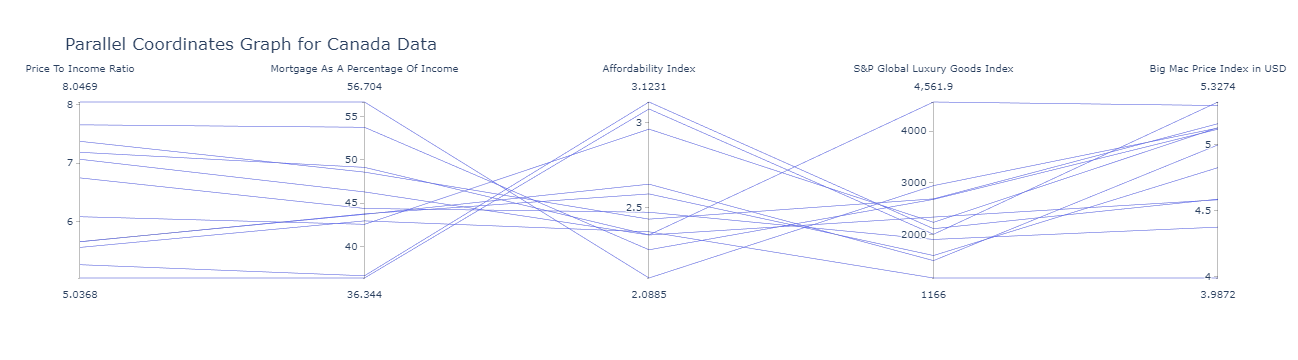

In [58]:
## Creating Parallel Coordinate variables and graphs for 10 countries

#Parallel coordinates for AU
AU = px.parallel_coordinates(Australia, title = "Parallel Coordinates Graph for Australia Data")

#Parallel coordinates for US
US = px.parallel_coordinates(United_States, title = "Parallel Coordinates Graph for United States Data")

#Parallel coordinates for JP
JP = px.parallel_coordinates(Japan, title = "Parallel Coordinates Graph for Japan Data")

#Parallel coordinates for SI
SI = px.parallel_coordinates(Singapore, title = "Parallel Coordinates Graph for Singapore Data")

#Parallel coordinates for SW
SW = px.parallel_coordinates(Switzerland, title = "Parallel Coordinates Graph for Switzerland Data")

#Parallel coordinates for AR
AR = px.parallel_coordinates(Argentina, title = "Parallel Coordinates Graph for Argentina Data")

#Parallel coordinates for RU
RU = px.parallel_coordinates(Russia, title = "Parallel Coordinates Graph for Russia Data")

#Parallel coordinates for BR
BR = px.parallel_coordinates(Brazil, title = "Parallel Coordinates Graph for Brazil Data")

#Parallel coordinates for ME
ME = px.parallel_coordinates(Mexico, title = "Parallel Coordinates Graph for Mexico Data")

#Parallel coordinates for CA
CA = px.parallel_coordinates(Canada, title = "Parallel Coordinates Graph for Canada Data")

CA

In [44]:
#adding graphs into columns
columns_of_parallel_1 = pn.Column(AU,US,JP,SI, SW, AR,RU, BR, ME, CA)
columns_of_parallel_2 = pn.Column(fig, PTIR, MAPI, AI)

Tabs
    [0] HoloViews(Curve, name='S&P 500 Global L...)
    [1] Plotly(Figure, name='Map')
    [2] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
        [4] Plotly(Figure)
        [5] Plotly(Figure)
        [6] Plotly(Figure)
        [7] Plotly(Figure)
        [8] Plotly(Figure)
        [9] Plotly(Figure)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
    [4] Row(name='Big Mac Price Index')
        [0] HoloViews(DynamicMap, name='Big Mac Price Index')
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='Country', options=['Australia', ...], value='Australia', width=250)
            [1] VSpacer()
    [5] PNG(PngImageFile, name='Australia data')
    [6] PNG(PngImageFile, name='Argentina data')
    [7] PNG(PngImageFile, name='Brazil data')
    [8] PNG(PngImageFile, name='Canada data')
    [9] PNG(PngImageFile, name='Japan data')
    [10] PNG(PngImageFile, name='Mexico data')
    [11] PNG(PngImageFile, name='Russia data')
    [12] PNG(PngImageFile, name='Singapore data')
    [13] PNG(PngImageFile, name='Switzerland data')
    [14] PNG(PngImageFile, name='United States data')
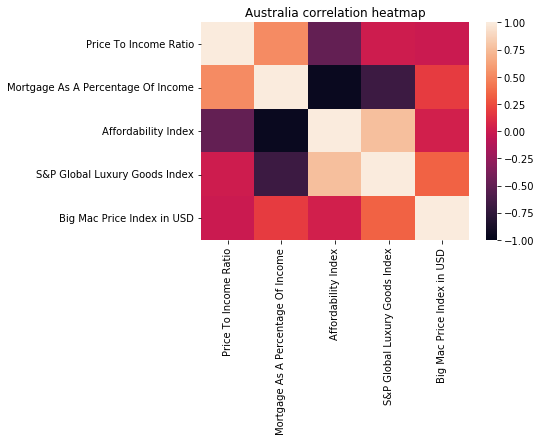
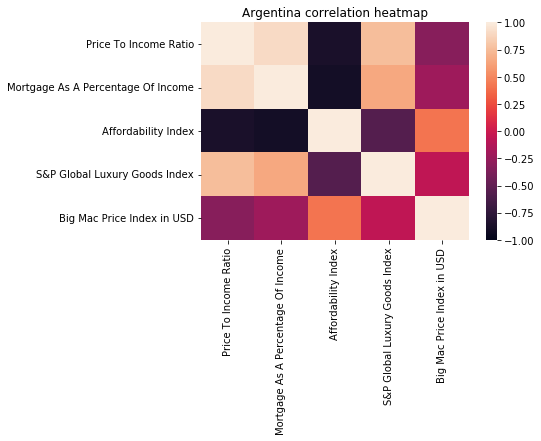
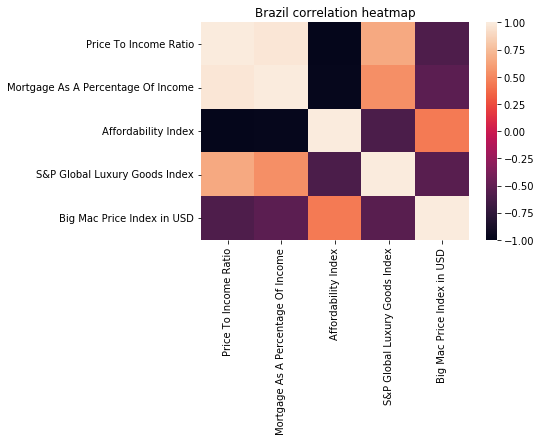
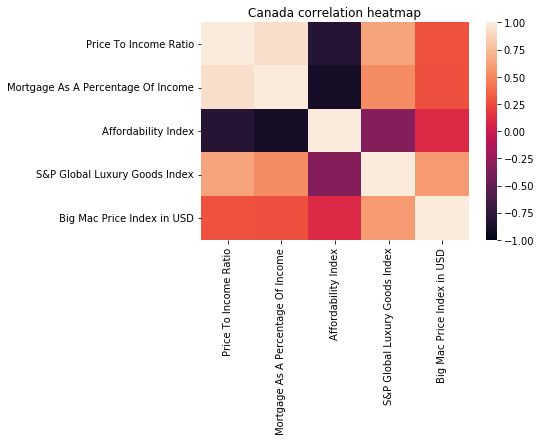
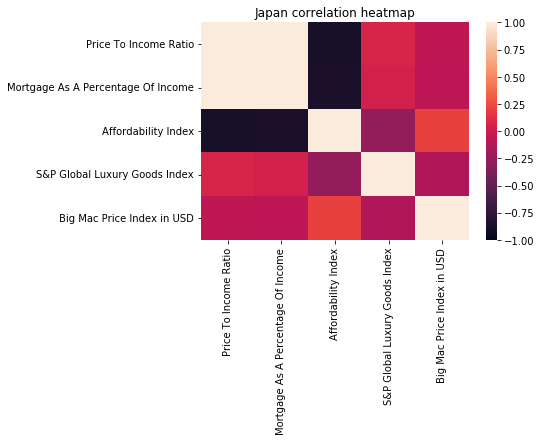
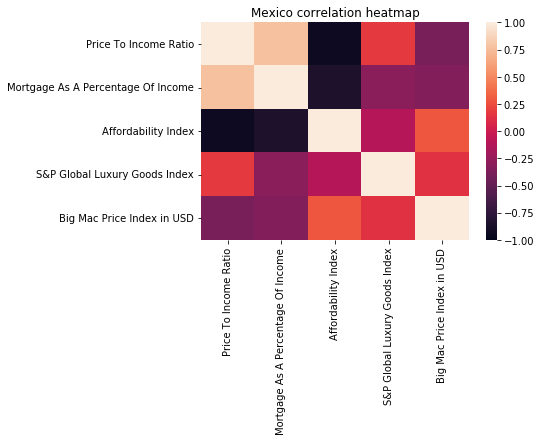
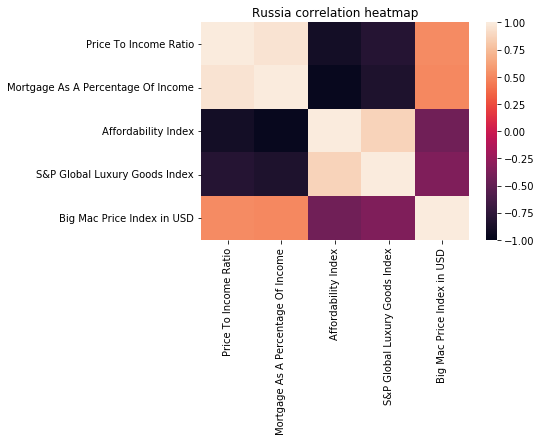
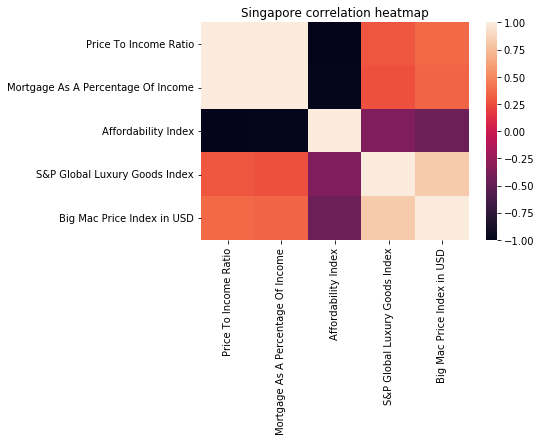
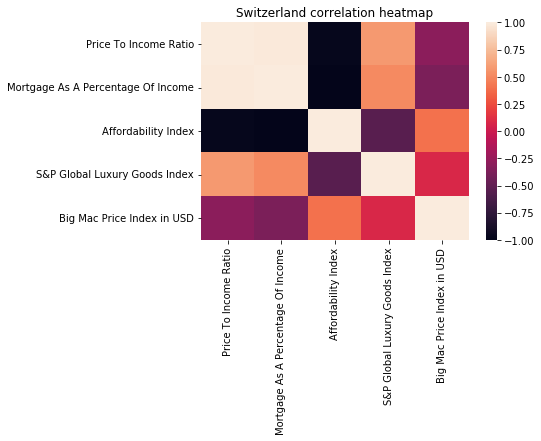
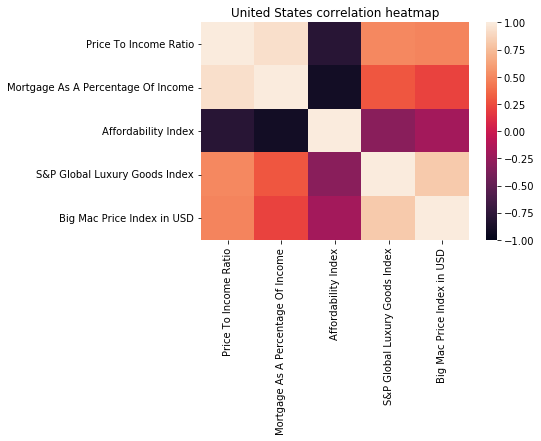

In [45]:
#Creating tabs to put our findings into dash board
tabs = pn.Tabs(
    ("S&P 500 Global Luxury Goods Index", plot_lg),
    ("Map", map_1),
    ("All Parallels", columns_of_parallel_1),
    ("Affordability indexes", columns_of_parallel_2),
    ("Big Mac Price Index", plot_bigmac),
    ("Australia data", imgAU),
    ("Argentina data", imgAR),
    ("Brazil data", imgBR),
    ("Canada data", imgCAN),
    ("Japan data", imgJP),
    ("Mexico data", imgME),
    ("Russia data", imgRS),
    ("Singapore data", imgSI),
    ("Switzerland data", imgSW),
    ("United States data", imgUS),
)
tabs
